## This notebook demonstrates how to setup and use the Rainy season Onset Metrics Package (ROMP)  

<br>



### ROMP structure  






<img src="ROMP_structure.png" width="490">



In [20]:
# import necessary libraries for this demo
from momp.lib.loader import get_cfg
from momp.utils.printing import print_cfg, print_data_info
from momp.utils.printing import tuple_to_str
from pathlib import Path
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display


<br>


## Installation

Follow the instructions in installation guidance [document](https://docs.google.com/document/d/18iatY4sVqlNrUAXQCd-EURKtPfw-ZjNib4RkS-j3-v4/edit?tab=t.homv0v9n1oxi#heading=h.7icx9r87yopj) or [README.md](https://github.com/bosup/MOMP/blob/main/README.md) to install ROMP  

The package is installed at



In [13]:
# get to know the local directory where the package is installed
cfg = get_cfg()
base_dir = cfg.base_dir
safe_path = Path(base_dir).expanduser().as_posix().replace(str(Path.home()), "~")
print(f"ROMP package directory is {safe_path}")

Configuration validated!
ROMP package directory is ~/Code/benchmarking/momp


<br>

## Set package configuration & benchmarking parameters

All parameters are set in `params/config.in`  

an example content of a config file 

In [3]:
# full package configurations & benchmarking parameters
config_path = cfg.base_dir.joinpath("params", "config.in")
text = Path(config_path).read_text()
print(text)

# ==============================================================================
# Rainy season Onset Metrics Package (ROMP) Configuration
# Version: 0.0.1
# Description: Workflow configuration for evaluating rainy season onset forecast 
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. CORE STRUCTURE & DIMENSIONS
# ------------------------------------------------------------------------------
project_name = "test ROMP run with demo data"

# Internal benchmarking workflow layout (e.g., dimensions in the processed case).
# Frozen with major ROMP versions
layout = ("model", "verification_window")

# List of models to process (e.g., "AIFS", "IFS", "NGCM").
# Must be in same forecast category, e.g., all probabilistic models
# for all parameters ending in '_list', keep the trailing comma if only one item
# the number of entries in '*_list' should be consistent with 'model_li

<br>

Refer to the [package configuration instructions notebook](package_configuration.ipynb) to prepare for the `config.in`    

<br>

## Data preperation

With where the package base directory in mind, make sure required input data are in designated directories. It is expected that you have access to the demo data in the google cloud bucket, or have downloaded the data to your local disk.


In [4]:
# retrieve input data directories from package configuration 
print_cfg(cfg, ["obs_dir", "ref_model_dir", "model_dir_list"])

obs_dir: ../demo/data/obs
ref_model_dir: ../demo/data/obs
model_dir_list: ('../demo/data/ifs', '../demo/data/ngcm')



    
required data include  
- **forecast model**  
- **reference model**  
- **observation (ground truth)**

and their filenames should follow certain naming convention as specified in 
`*_file_pattern` parameters in `params/config.in`

such as


In [5]:
# input data naming convention
print_cfg(cfg, "file_pattern")

obs_file_pattern: ('{}.nc',)
ref_model_file_pattern: {}.nc
file_pattern_list: ('{}.nc', '{}.nc')


where the placeholder is to be replaced by year or date string  

for example, 

In [6]:
# model forecast data
model_dir = Path(cfg.model_dir_list[0])
model_name = cfg.model_list[0]
print(f"model = {model_name}")
!ls {model_dir}

model = IFS
2015.nc


Acceptable data type can be either `.nc` or `.zarr`  
They must have standard spatiotemporal dimensions including `lat`, `lon`, forecast initialization time `time` or `init_time`, forecast steps as `step` or `day`. Ensemble forecast data are expected to have an additional ensemble dimension as `ensemble`, `member` or `number`.

Valid format and dimensions of the input data (deterministic model) look like:

In [7]:
print_data_info(model_dir)


File: 2015.nc

Dimensions:
  number: 11
  day: 46
  time: 26
  lat: 8
  lon: 9

Variables:
  tp


<br>

## Run the ROMP benchmarking package  

#### ROMP supports two operational modes:
- **Production mode**: Executed via the command line interface (CLI) for standard workflows and automated pipelines.
- **Research mode**: Accessible as an importable Python module, enabling interactive experimentation, analysis, and integration within Python scripts or Jupyter notebooks.  


### 1 - &nbsp;Run ROMP in **production mode**  
With properly configured `config.in`, the main benchmarking workflow is executed via the CLI:               

`momp-run`

Typical steps performed:
1. Load configuration
2. Set up benchmarking cases
3. Read model and observation data
4. Detect rainy season onset
5. Evaluate model against reference data
6. Generate benchmarking metrics
7. Save metric outputs and figures
8. Make metric plots
   
with all parameters and flags properly configured, run ROMP, and pay attention to the runtime console output

In [64]:
! momp-run

package base dir ~/Code/benchmarking/momp
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!

  ____    ___   __  __  ____
 |  _ \  / _ \ |  \/  ||  _ \
 | |_) || | | || |\/| || |_) |
 |  _ < | |_| || |  | ||  __/
 |_| \_\ \___/ |_|  |_||_|

 Rainy season Onset Metrics Package (ROMP)
 Version : 0.0.1

--------------------------------------------------------------------------------
 Project    : test ROMP run with demo data
 Start Time : 2026-02-03T18:30:52
--------------------------------------------------------------------------------

 Initializing analysis pipeline...

2026-02-03 18:30:52 [INFO] Starting ROMP Workflow...
processing IFS onset evaluation for verification window (1, 15), case: IFS_1-15

1. Processing forecast model...
Processing years: (2015,)

--------------------------------------------------
Processing year 2015
Loading S2S model data...
Loading IMD rainfall data...
Detecting observed onset...

<br>
<br>

Users can optionally keep an edited copy of the configuration file outside the sitepackage with job specific filename such as `config_job1.in`, then run ROMP as

```
momp-run -p /path_to/config_job1.in
```

This method only works when running ROMP from the CLI

In [9]:
# example ROMP run with deterministic forecast data
! momp-run -p ../demo/data/config_det.in

package base dir /Users/bodong/Code/benchmarking/momp
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!

  ____    ___   __  __  ____
 |  _ \  / _ \ |  \/  ||  _ \
 | |_) || | | || |\/| || |_) |
 |  _ < | |_| || |  | ||  __/
 |_| \_\ \___/ |_|  |_||_|

 Rainy season Onset Metrics Package (ROMP)
 Version : 0.0.1

--------------------------------------------------------------------------------
 Project    : test ROMP run with demo data
 Start Time : 2026-02-03T16:32:49
--------------------------------------------------------------------------------

 Initializing analysis pipeline...

2026-02-03 16:32:49 [INFO] Starting ROMP Workflow...
processing AIFS onset evaluation for verification window (1, 15), case: AIFS_1-15

--------------------------------------------------
Processing year 2015
Extracting model forecast data ...
Computing onset for model forecast ...
Processing 26 init times x 7 lats x 5 lons...

Proces

<br>

The package also supports passing specific parameter values via command-line options for quick sensitivity tests.  

for available CLI parameter and flag options, run `momp-run -h`

In [63]:
! momp-run -h

package base dir ~/Code/benchmarking/momp
usage: momp-run [-h] [--model_list MODEL_LIST [MODEL_LIST ...]]
                [--verification_window_list VERIFICATION_WINDOW_LIST]
                [--max_forecast_day MAX_FORECAST_DAY] [--wet_init WET_INIT]
                [--wet_threshold WET_THRESHOLD] [--wet_spell WET_SPELL]
                [--dry_threshold DRY_THRESHOLD] [--dry_spell DRY_SPELL]
                [--dry_extent DRY_EXTENT]
                [--onset_percentage_threshold ONSET_PERCENTAGE_THRESHOLD]
                [--tolerance_days_list TOLERANCE_DAYS_LIST [TOLERANCE_DAYS_LIST ...]]
                [--day_bins DAY_BINS]
                [--start_date START_DATE START_DATE START_DATE]
                [--end_date END_DATE END_DATE END_DATE]
                [--show_plot SHOW_PLOT] [--show_panel SHOW_PANEL]
                [--probabilistic PROBABILISTIC] [--debug DEBUG]
                [--region REGION]

ROMP Package Parameter Loader

options:
  -h, --help            show this help 

<br>

### 2 - &nbsp;Run ROMP in **Research mode**  
#### Option 1. Invoke the package API as a module  

`python -m momp.app.onset_time_series`  

<br>

#### Option 2. import ROMP as a python package  

`from momp.app.onset_time_series import obs_onset_analysis as ons`  

and then write your own diagnositic code leveraging the `obs_onset_analysis()` functionality

<br>

Here is an example of using `obs_onset_analysis()` for diagnosing rainy season onset at a specific location


--------------------------------------------------
Processing year 2015
onset time series figure saved to ../demo/figure/onset_time_series.png


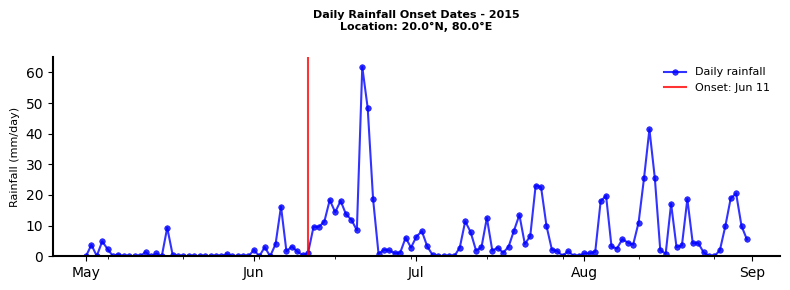

In [62]:
from momp.app.onset_time_series import obs_onset_analysis as ons
_ = ons(year=2015, lat_select=20, lon_select=80, **vars(cfg))

## Metric Results

`dir_out` tells where the package output data are located  
spatial metrics are saved in `.nc` files  
domain averaged probabilistic metrics are saved in `.csv` files

In [10]:
# benchmarking output data
dir_out = Path(cfg.dir_out)
print("\n\nbenchmarking metrics data in --> ", dir_out, "\n\n")
!ls {dir_out}/*.nc {dir_out}/*.csv



benchmarking metrics data in -->  ../demo/output 


../demo/output/binned_skill_scores_IFS_1-15.csv
../demo/output/binned_skill_scores_NGCM_1-15.csv
../demo/output/climatology_onset_doy_2013-2020.nc
../demo/output/overall_skill_scores_IFS_1-15.csv
../demo/output/overall_skill_scores_NGCM_1-15.csv
../demo/output/spatial_metrics_AIFS_1-15.nc
../demo/output/spatial_metrics_AIFS_16-30.nc
../demo/output/spatial_metrics_climatology_1-15.nc
../demo/output/spatial_metrics_climatology_16-30.nc
../demo/output/spatial_metrics_IFS_1-15.nc
../demo/output/spatial_metrics_NGCM_1-15.nc


<br>

Below is an example of saved binned skill scores from the benckmarking of a probabilistic forecast  


In [48]:
window =  cfg.verification_window_list[0]
# filename = base_dir.joinpath(dir_out, f"binned_skill_scores_{model_name}_{tuple_to_str(window)}.csv")
filename = os.path.join(dir_out, f"binned_skill_scores_{model_name}_{tuple_to_str(window)}.csv")
print("\nloading saved metrics from ", filename, "\n")
df_bins = pd.read_csv(filename)
df_bins


loading saved metrics from  ../demo/output/binned_skill_scores_IFS_1-15.csv 



,Bin,clean_bins,Fair_Brier_Skill_Score,AUC,AUC_ref,Fair_Brier_Score_Forecast,Fair_Brier_Score_Climatology
0,Days 1-5,1-5,-0.370846,0.890705,0.906099,0.094175,0.068698
1,Days 6-10,6-10,-0.438974,0.709260,0.881267,0.092233,0.064096
2,Days 11-15,11-15,-0.433925,0.626512,0.878573,0.089320,0.062291


<br>

metric plots are saved in the output figure folder as defined in `dir_fig`  



In [47]:
# metrics plots
dir_fig = Path(cfg.dir_fig)
print("\nmetrics plots in --> ", dir_fig, "\n")
!ls {dir_fig}


metrics plots in -->  ../demo/figure 

climatology_onset_2013-2020.png
panel_bar_BSS_RPSS_AUC_1-15.png
panel_portrait_BSS_AUC_1-15.png
panel_portrait_mae_far_mr_AIFS_30day.png
reliability_IFS_1-15.png
reliability_NGCM_1-15.png
skill_scores_heatmap_IFS_1-15.png
skill_scores_heatmap_NGCM_1-15.png
spatial_metrics_AIFS_1-15.png
spatial_metrics_AIFS_16-30.png
spatial_metrics_climatology_1-15.png
spatial_metrics_climatology_16-30.png
spatial_metrics_IFS_1-15.png
spatial_metrics_NGCM_1-15.png


<br>

if `plot_heatmap` is set to `True`, it plots a heatmap of BSS and AUC

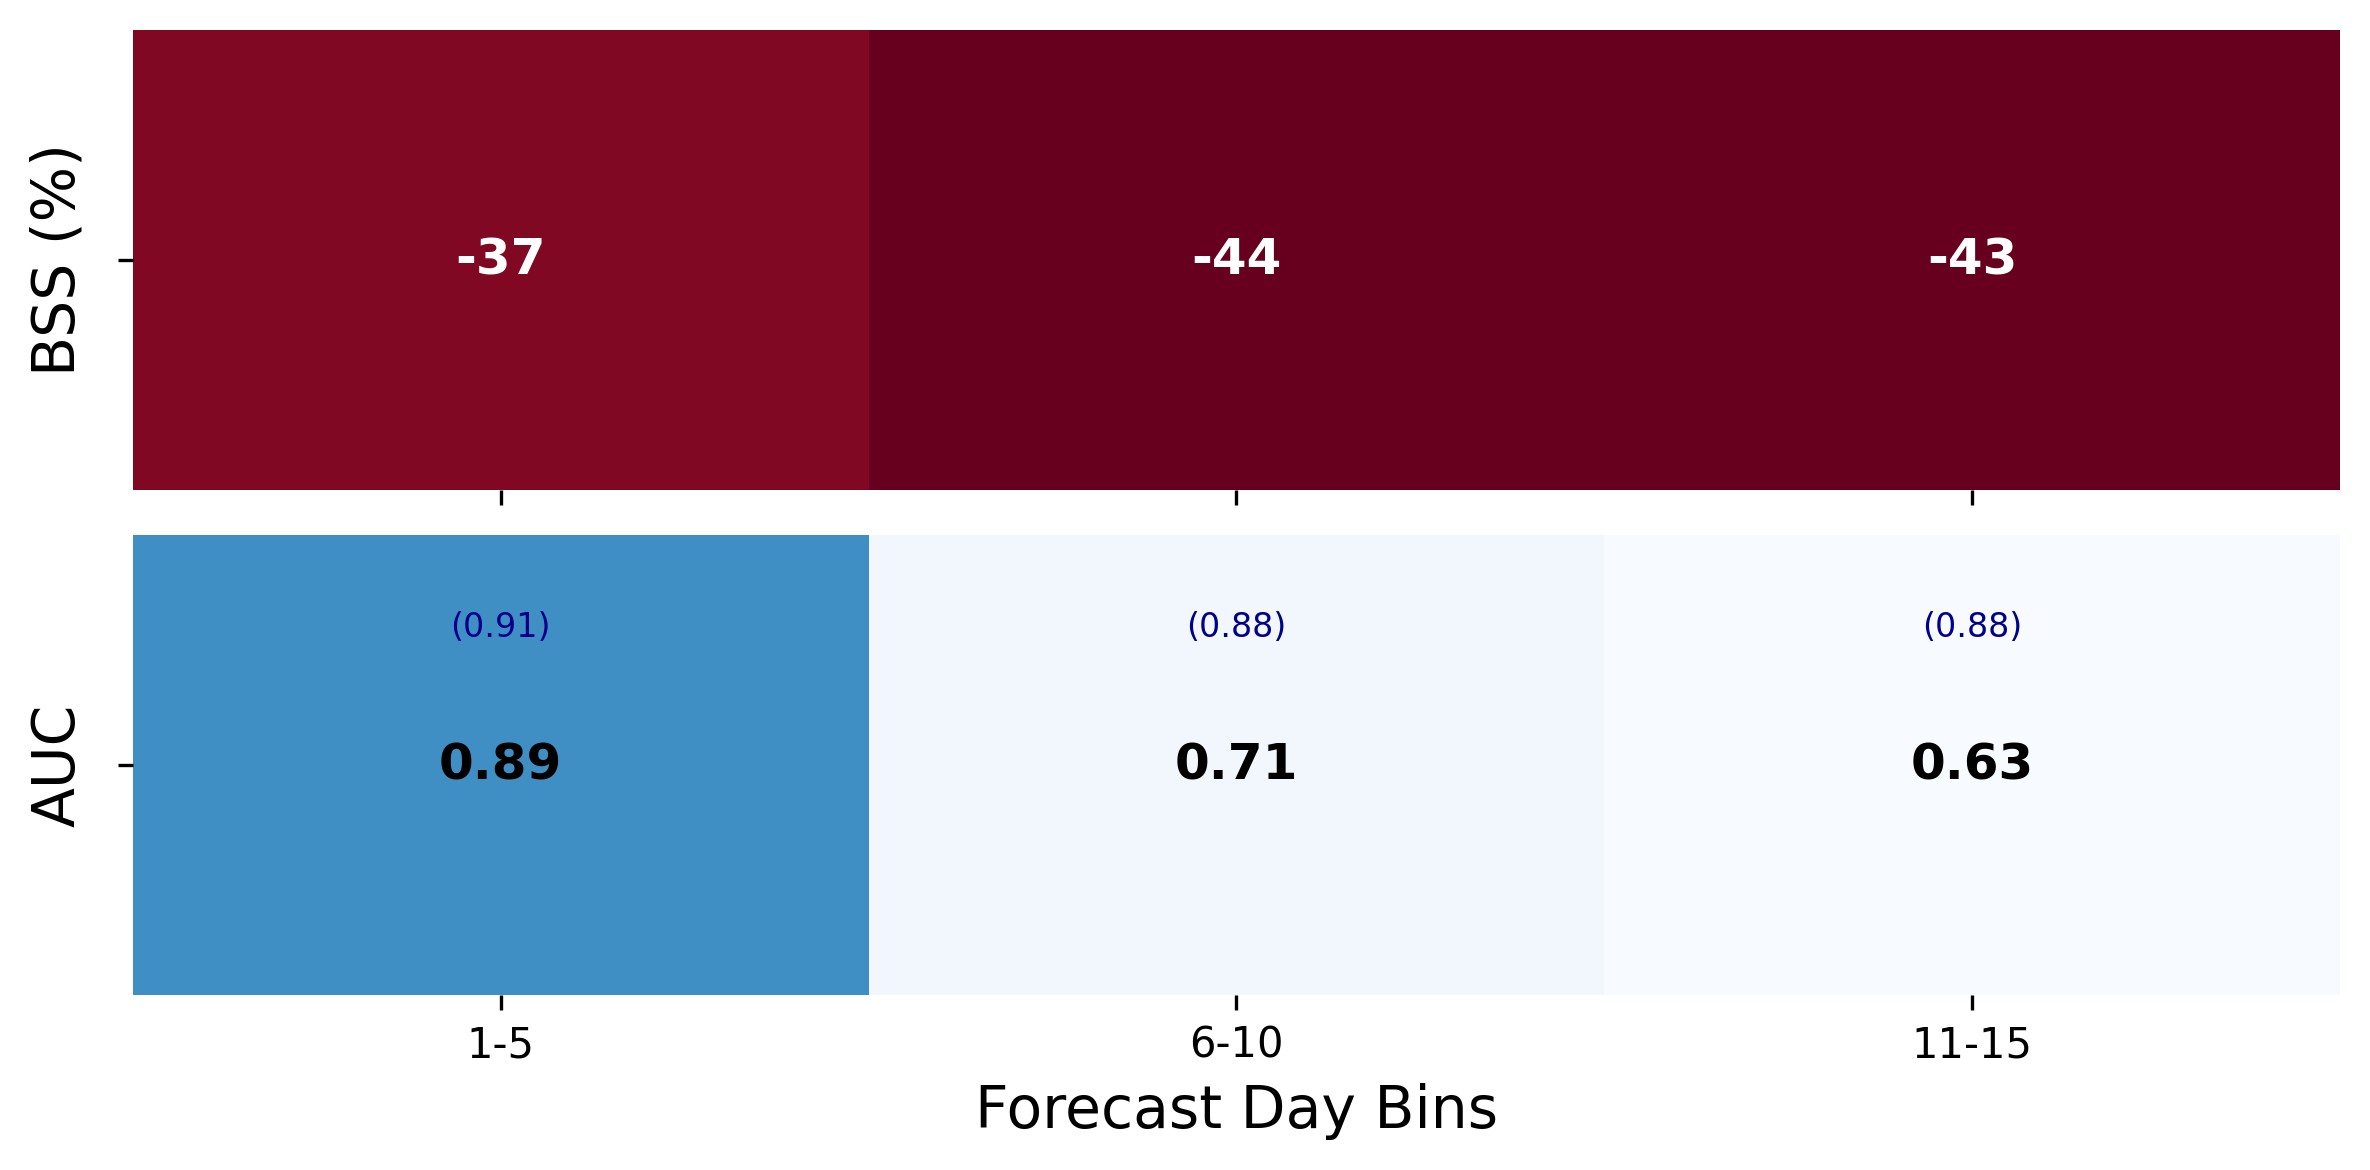

In [44]:
# Load image from file
fig_filename = base_dir.joinpath(dir_fig, f'skill_scores_heatmap_{model_name}_{tuple_to_str(window)}.png')
# img = mpimg.imread(fig_filename)  
# plt.figure(figsize=(4, 3))
# plt.imshow(img)
display(Image(filename=fig_filename, width=390))

<br>

if `plot_reliability` is set to `True`, it generates a reliability diagram

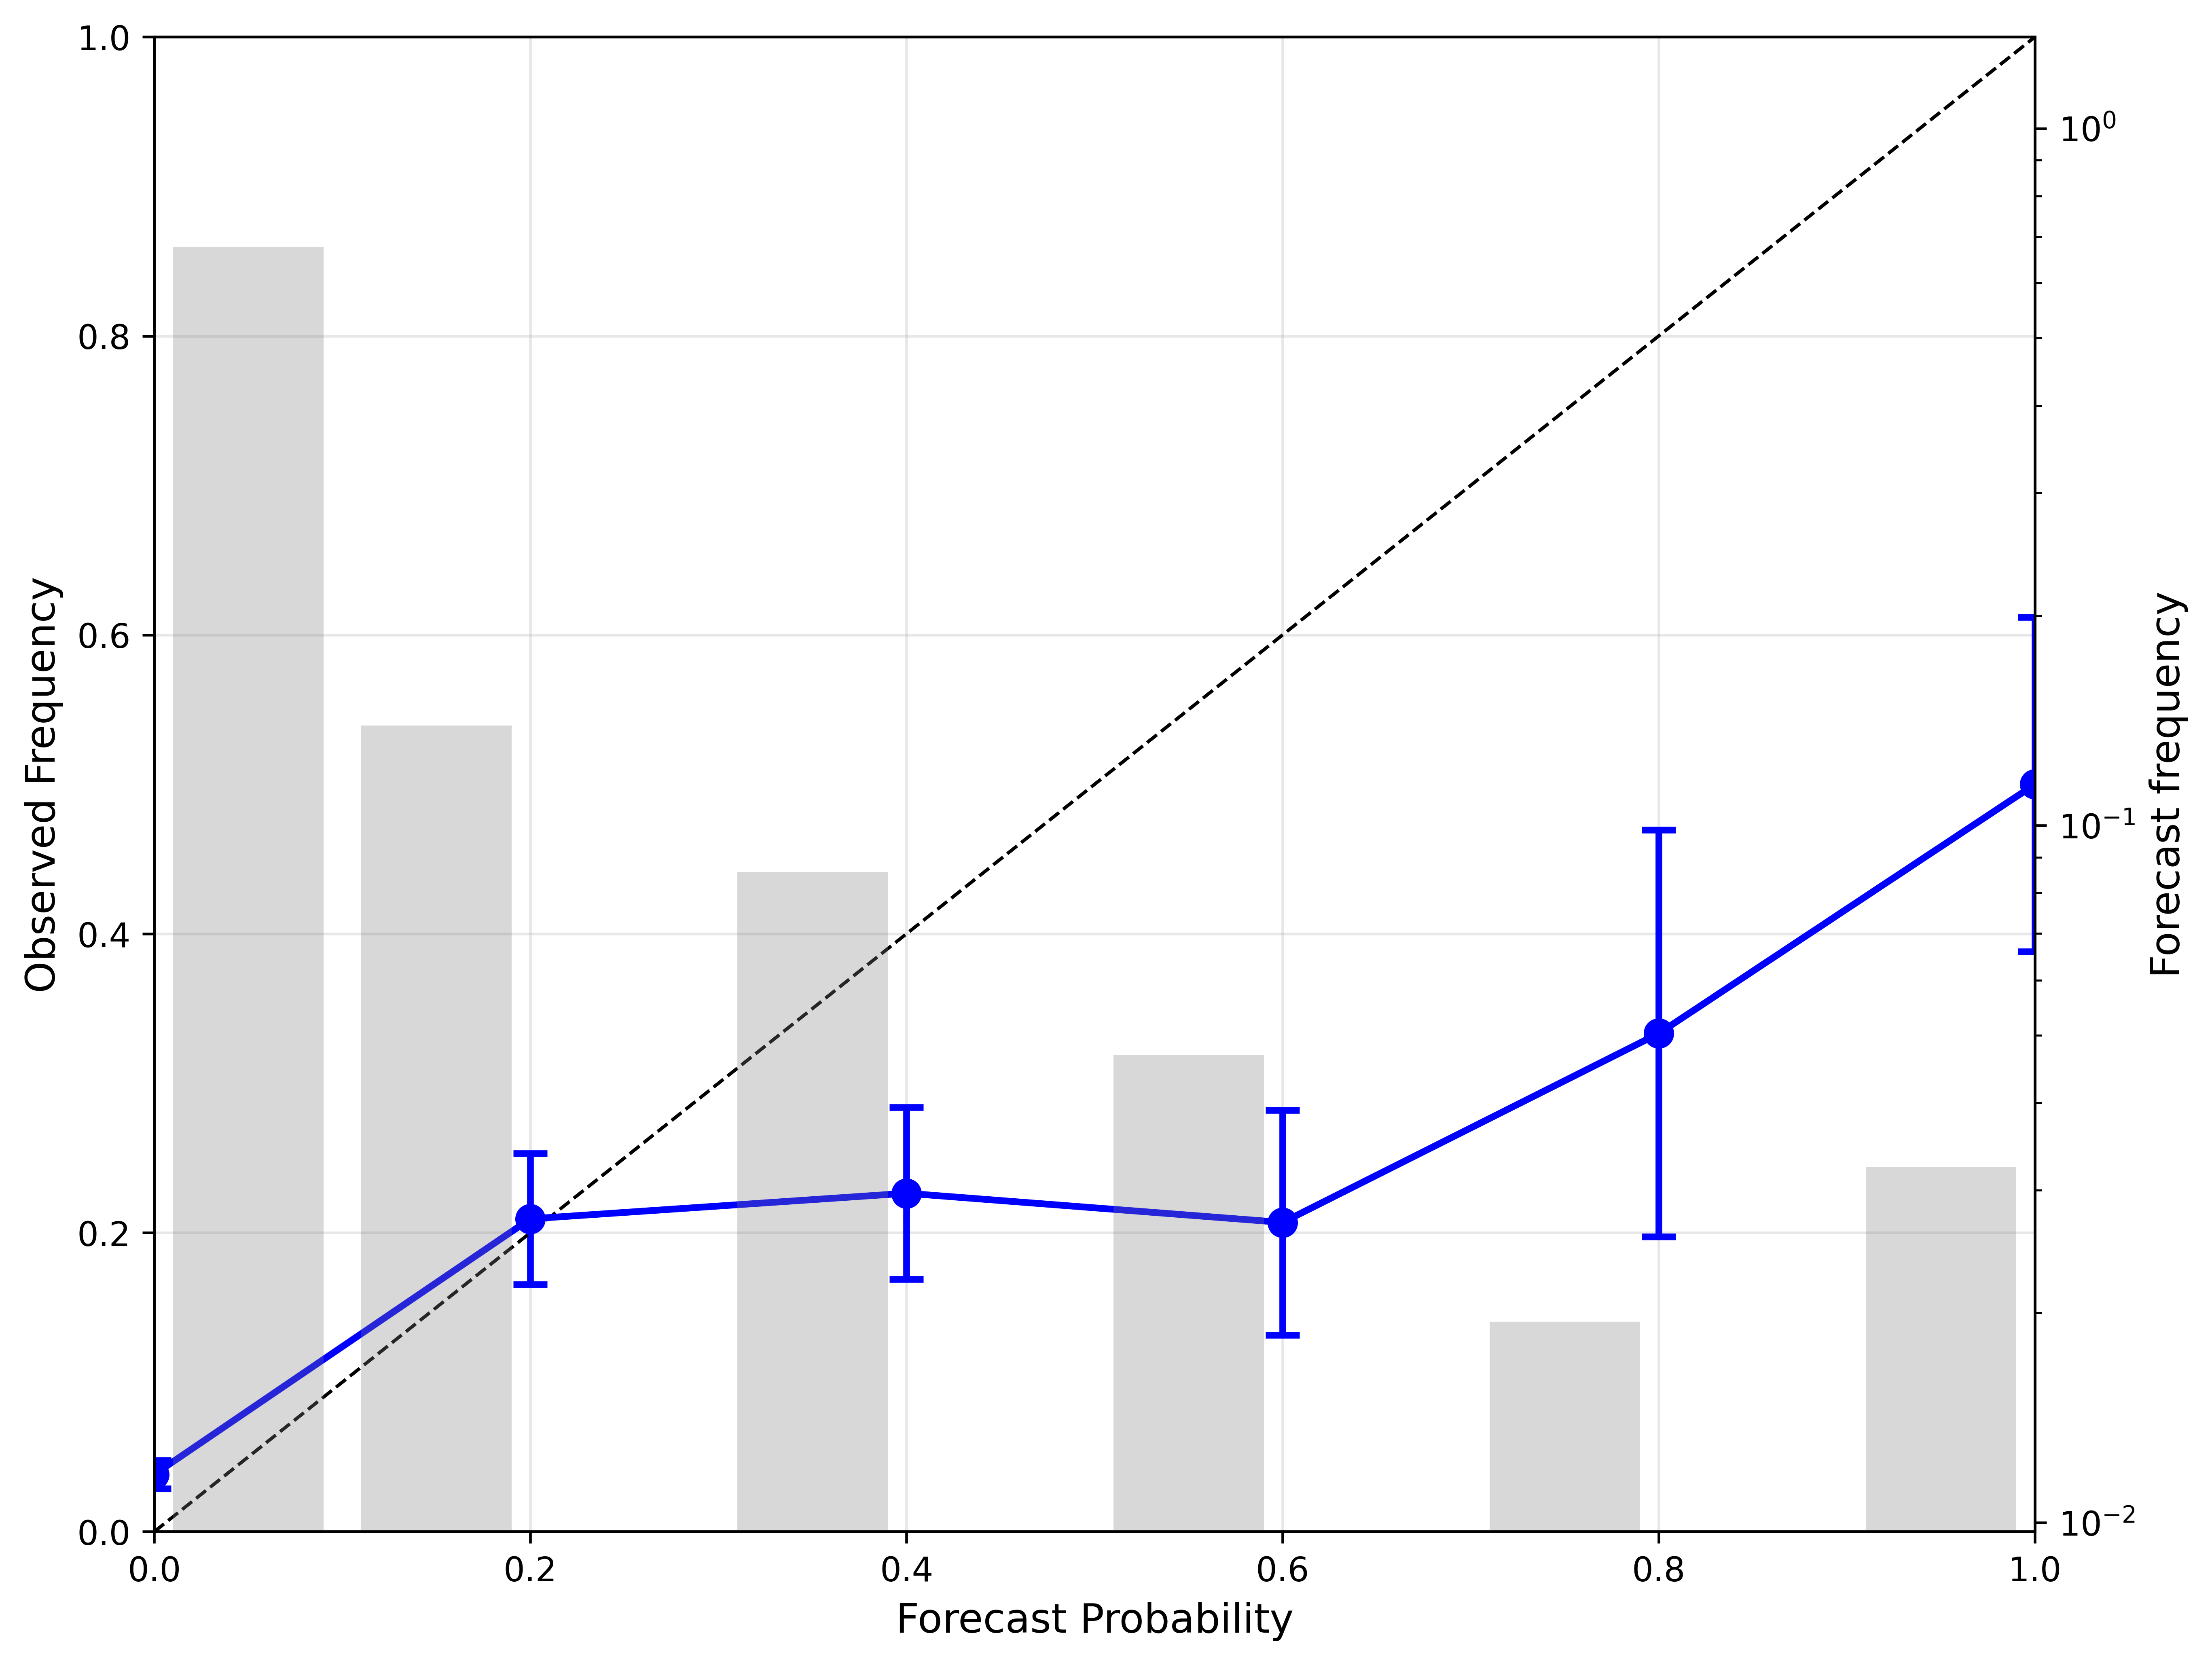

In [32]:
fig_filename = base_dir.joinpath(dir_fig, f'reliability_{model_name}_{tuple_to_str(window)}.png')
display(Image(filename=fig_filename, width=390))

<br>

if  `plot_bar_bss_rpss_auc` is set to `True`, it generates a bar plot for metrics BSS, RPSS and AUC 

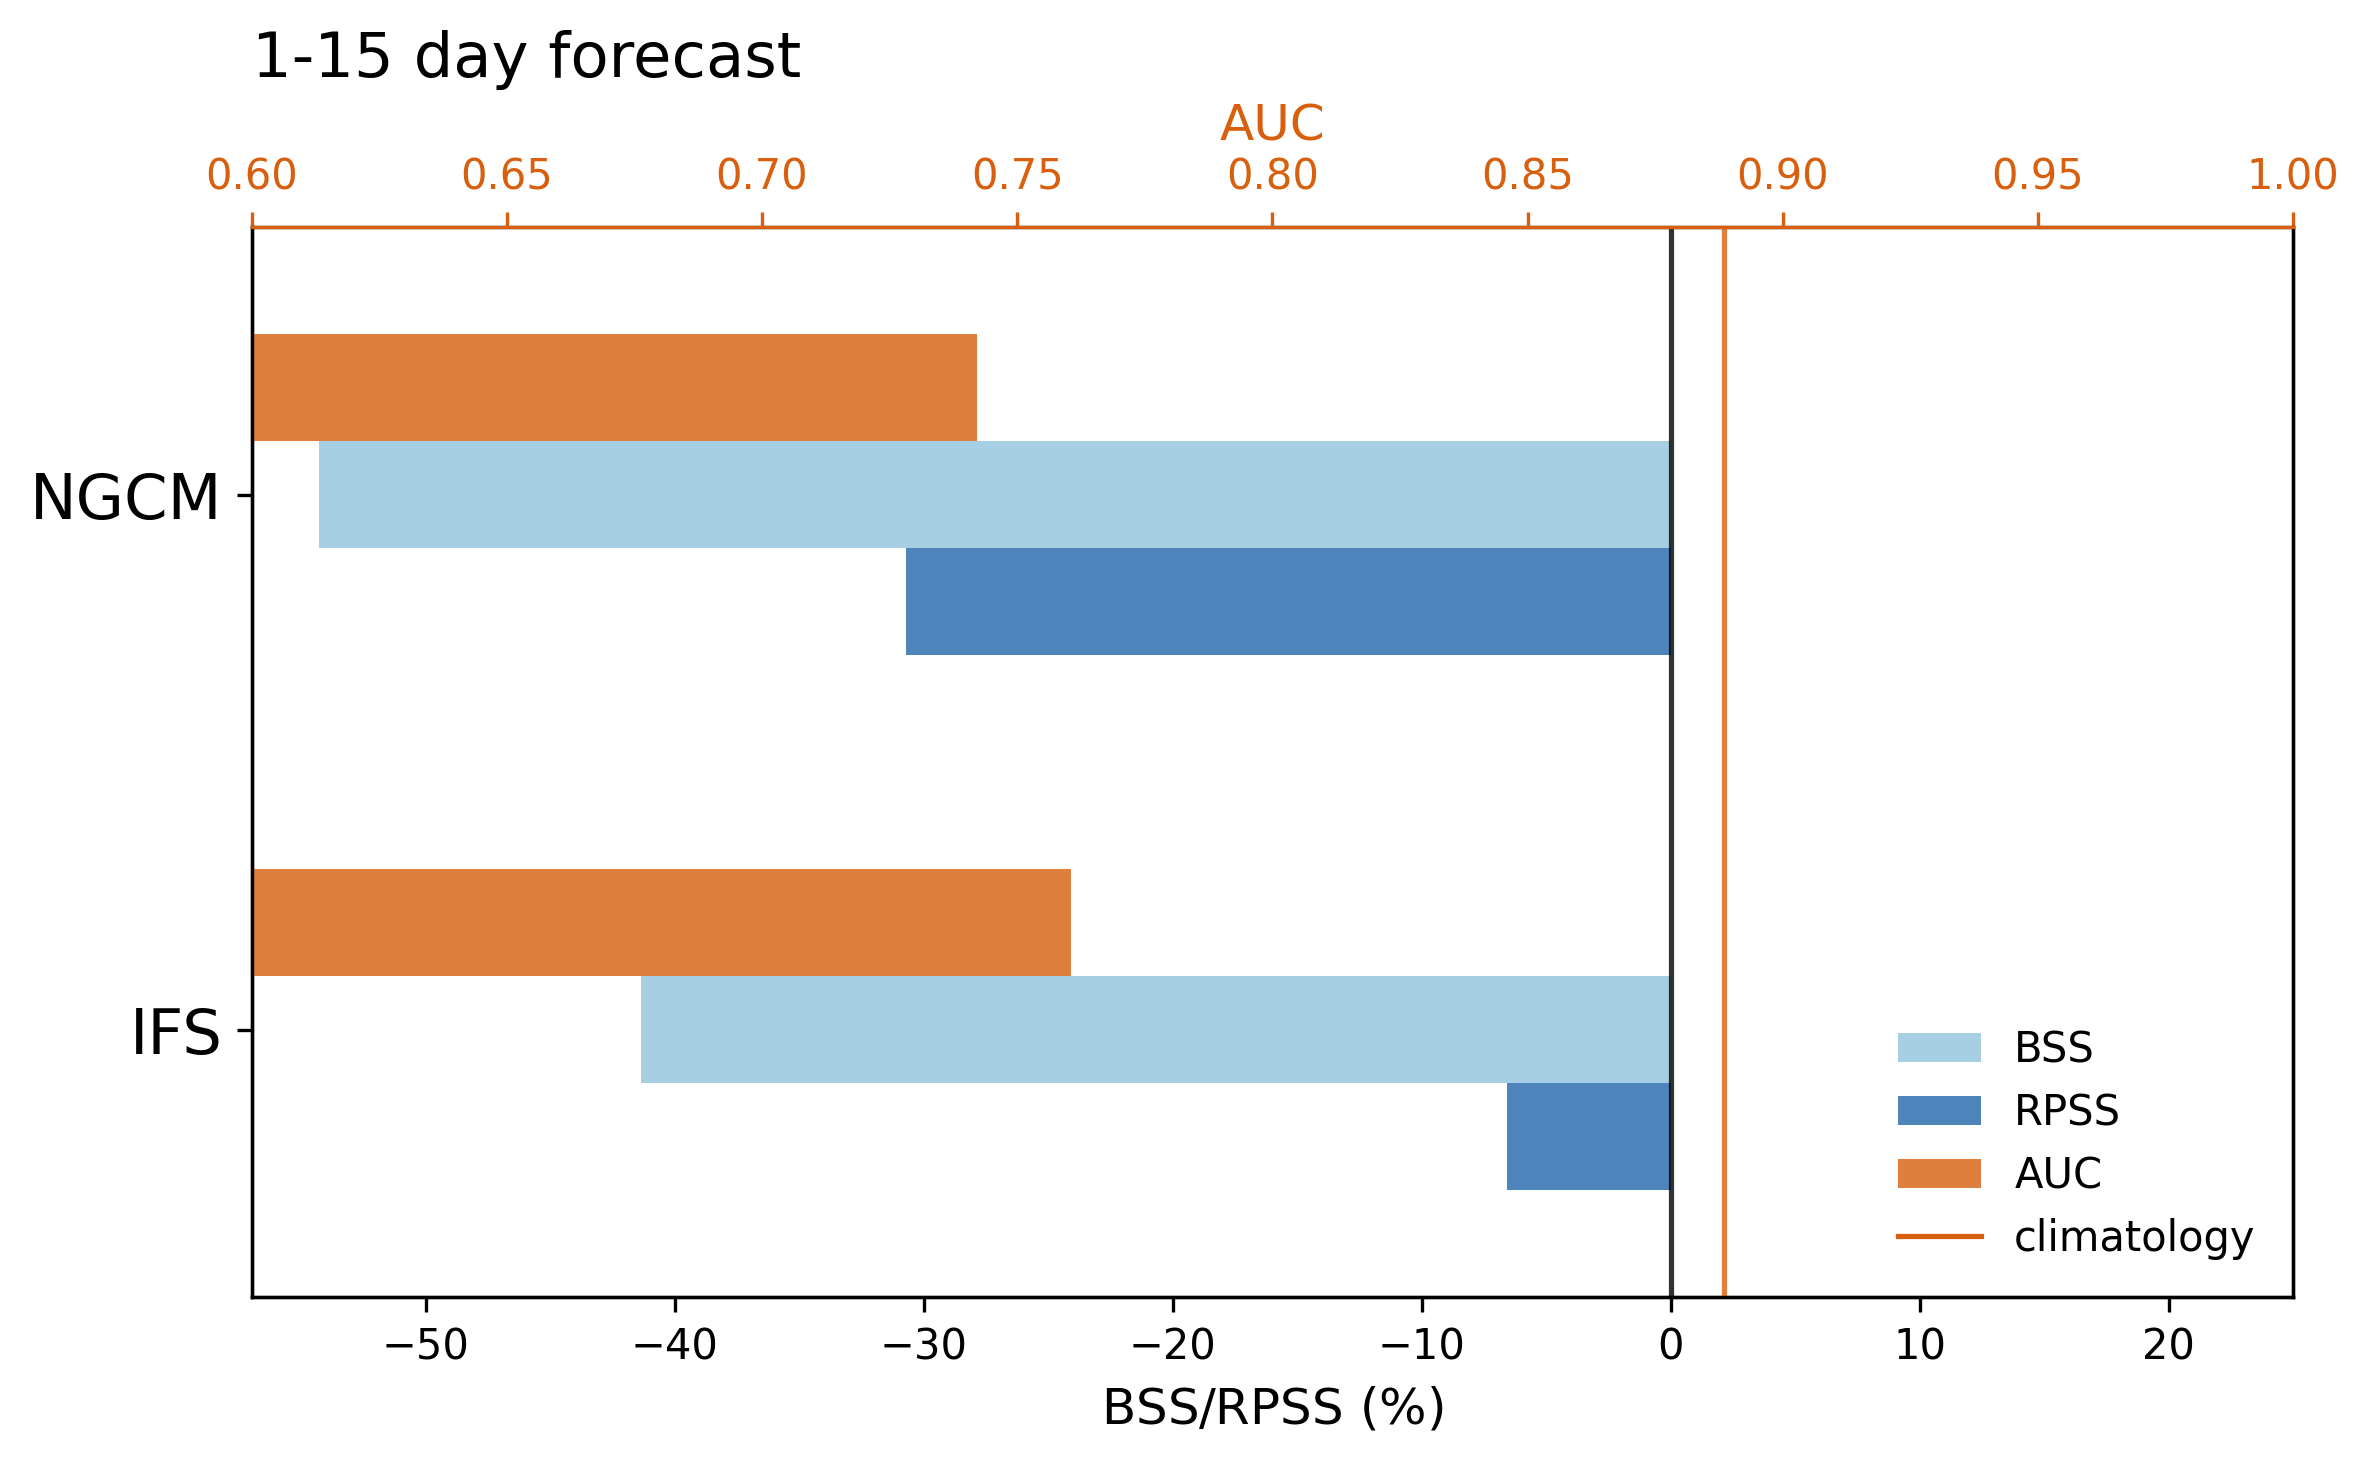

In [33]:
fig_filename = base_dir.joinpath(dir_fig, f'panel_bar_BSS_RPSS_AUC_{tuple_to_str(window)}.png')
display(Image(filename=fig_filename, width=450))

<br>

if `plot_panel_heatmap_skill` set to `True`, it generates a heatmap of skill scores across models and forecast bins  


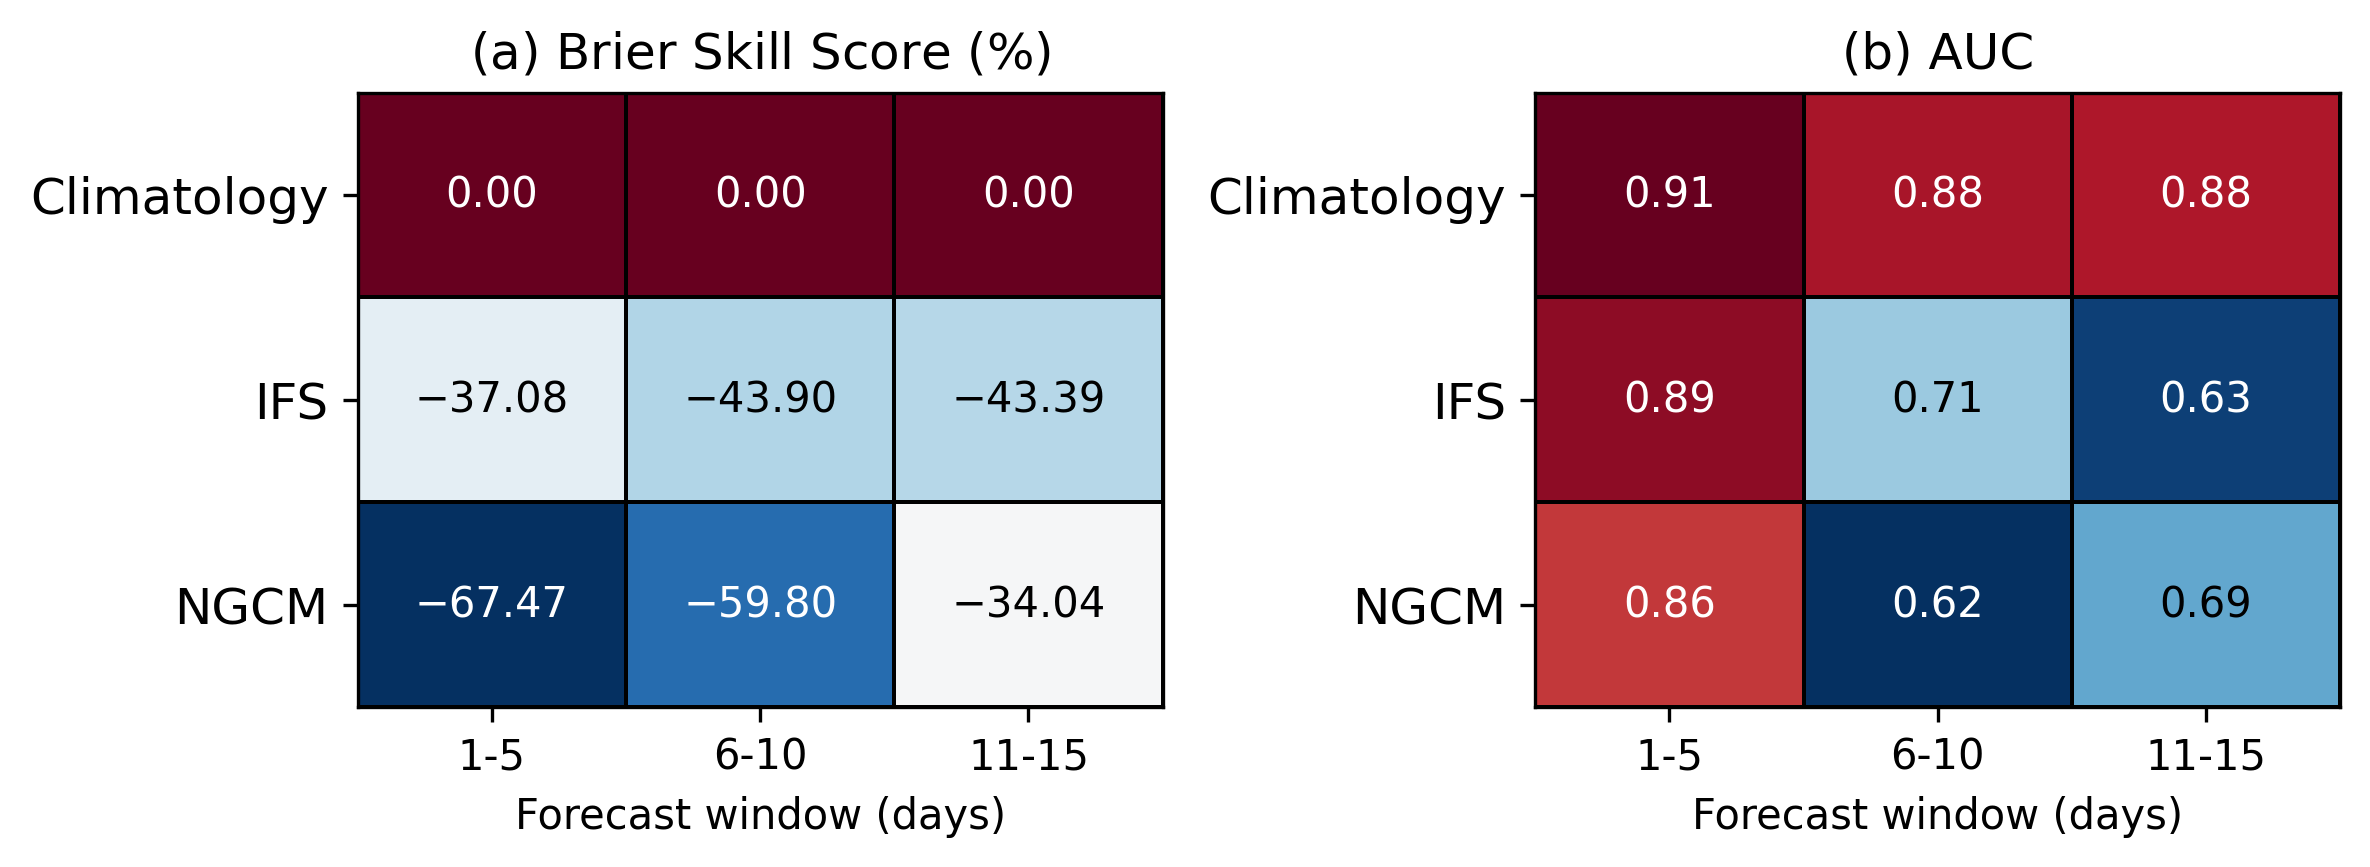

In [37]:
fig_filename = base_dir.joinpath(dir_fig, f'panel_portrait_BSS_AUC_{tuple_to_str(window)}.png')
display(Image(filename=fig_filename, width=550))

<br>
<br>

For deterministic forecast, spatial metrics MAE, FAR, MR are saved in netcdf files

In [45]:
filename = os.path.join(dir_out, f"spatial_metrics_{model_name}_{tuple_to_str(window)}.nc")
ds = xr.open_dataset(filename)
print("\n loading saved metrics from ", filename)
ds


 loading saved metrics from  ../demo/output/spatial_metrics_IFS_1-15.nc


<xarray.Dataset> Size: 1kB
Dimensions:           (lat: 7, lon: 5)
Coordinates:
  * lat               (lat) float64 56B 8.0 12.0 16.0 20.0 24.0 28.0 32.0
  * lon               (lon) float64 40B 72.0 76.0 80.0 84.0 88.0
Data variables:
    false_alarm_rate  (lat, lon) float64 280B ...
    miss_rate         (lat, lon) float64 280B ...
    mean_mae          (lat, lon) float64 280B ...
    mae_2015          (lat, lon) float64 280B ...
Attributes:
    model:                IFS
    years:                2015
    tolerance_days:       3
    verification_window:  1,15
    max_forecast_day:     15
    mok:                  None
    title:                Monsoon Onset MAE, FAR, MR Analysis
    description:          Spatial maps of Mean Absolute Error, False Alarm Ra...

<br>

an example of spatial error metrics plot

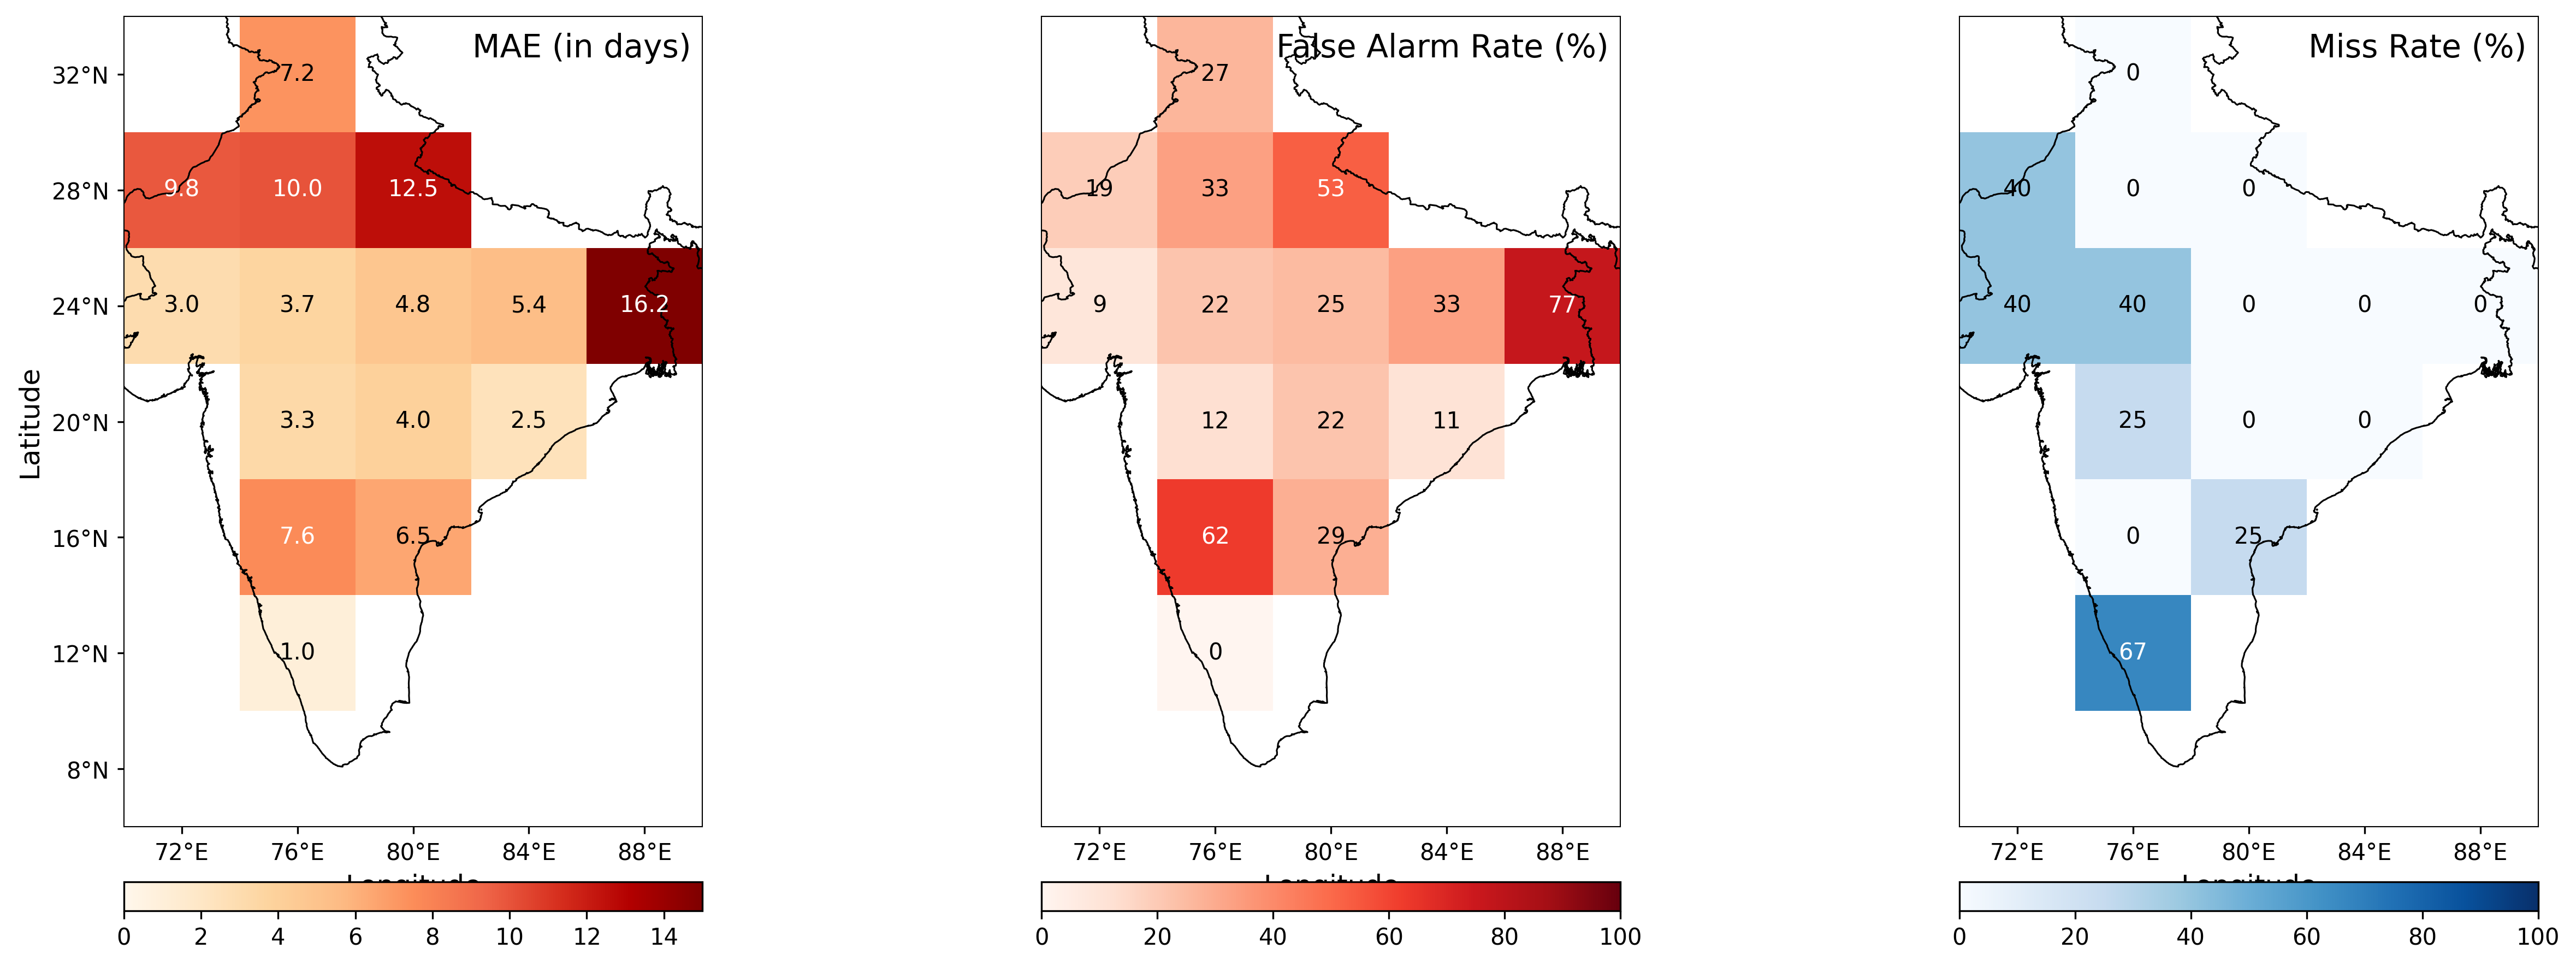

In [42]:
# fig_filename = base_dir.joinpath(dir_out, f'spatial_metrics_{model_name}_{"-".join(map(str, window))}.png')
fig_filename = os.path.join(dir_fig, f"spatial_metrics_{model_name}_{tuple_to_str(window)}.png")
display(Image(filename=fig_filename, width=800))

In [70]:
from momp.lib.loader import get_cfg, get_setting
from momp.app.bin_skill_score import skill_score_in_bins
from momp.app.spatial_far_mr_mae import spatial_far_mr_mae_map
from momp.utils.printing import print_momp_banner
